In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
#교차검증을 위한 라이브러리


In [6]:
#1. 문제정의'
#버섯의 특징을 활용해 독/식용 버섯 분류
#decision tree 시각화 & 과대적합 제어
#특성 중요도 확인

In [7]:
#2.데이터 수집

In [8]:
mush = pd.read_csv('mushroom.csv')

In [9]:
mush.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
#3.데이터 전처리 
#info: 결측치, 데이터 타입
#describe : 이상치 확인
#이상치를 확인할때 데이터가 수치형 데이터여야 함
#결측치 파악

In [11]:
#결측치 파악
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
#이상치 파악
#count : 데이터 개수
#unique : 중복을 제거한 데이터 개수
#top : 가장 많은 비율을 차지하는 데이터
#freq : top 의 실제 데이터

#Train의 비율을 높일때
#: 기존 데이터로 규칙을 찾았는데 조금 부족하다
#: 규칙을 조금더 세세하게 찾고싶다
#* test의 비율이 낮아지므로 test score에 대해서 신뢰도가 낮아짐

#Test의 비율을 높일때
#: test score의 신뢰도를 높이고싶을때
#* train의 비율이 낮아지므로 규칙을 조금 덜 세세하게 찾음
#* 데이터가 충분할 때
mush.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
X= mush.loc[:,'cap-shape':]
y= mush.loc[:,'poisonous']

In [14]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [15]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [16]:
X= mush.iloc[:,1:]
y= mush.iloc[:,0]#series
#y= mush.iloc[:,:1]#DataFrame


In [17]:
#원핫인코딩
#get_dummies
#문자형 컬럼을 수치형 컬럼으로 변화시키는 작업
#컬럼에 있는 unique수만큼 새로운 컬럼이 생성됨
#get_dummies
X_onehot=pd.get_dummies(X)

In [18]:
X_onehot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [19]:
#train, test분리
X_train, X_test, y_train, y_test = train_test_split(
                            X_onehot,#문제데이터
                            y,#정답데이터
                            test_size = 0.3,#정답비율
                            random_state=3)#섞는방법)

In [20]:
#7.평가

In [21]:
##4. 탐색적 데이터 분류

In [22]:
##5.모델 선택 및 하이퍼파라미터 튜닝


In [23]:
tree = DecisionTreeClassifier()

###### 6. 학습

In [24]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
#7.평가

In [26]:
print('train score', tree.score(X_train, y_train))
print('test score', tree.score(X_test, y_test))

train score 1.0
test score 1.0


In [27]:
#tree 모델의 특성 중요도 확인하기
# 누나 모두 재실행했어 ?아니
fi = tree.feature_importances_
fi

array([0.00000000e+00, 1.40467380e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38784363e-03, 0.00000000e+00, 2.29503788e-02, 0.00000000e+00,
       0.00000000e+00, 2.30627489e-02, 1.58289134e-02, 6.16063447e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.92150180e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.75846481e-01, 0.00000000e+00, 8.97862256e-02,
      

In [29]:
#q보기좋게 만들기
#pd.DataFrame(fi,index = X_onehot.columns).sort_values(by=0, ascending=False)
#특성요도는 0~1 사이의 숫자로 이루어짐
#117개 컬럼의 특성 중요도의 총합은 1


importance_df = pd.DataFrame(fi, index = X_onehot.columns)


importance_df.sort_values(by = 0, ascending=False)

,0
odor_n,0.616063
stalk-root_c,0.175846
stalk-root_r,0.089786
spore-print-color_r,0.032861
odor_l,0.023063
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000


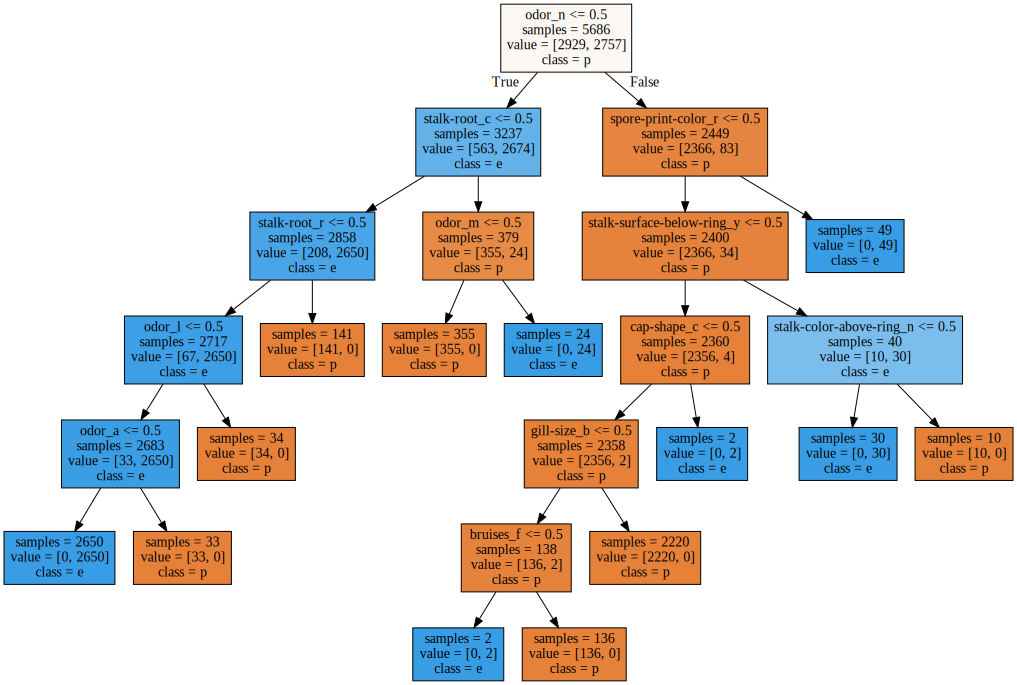

train score :1.0
test score : 1.0


In [31]:
#시각화
# 시각화 하기
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_onehot.columns,
               impurity=False,
               filled=True)

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
!pip install graphviz

import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# png로 저장하기
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

# 7.평가하기
print(f'train score :{tree.score(X_train,y_train)}')
print('test score : {}'.format(tree.score(X_test,y_test)))